In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import bar_chart_race as bcr
import pycountry             
import operator
from collections import Counter
import warnings 

# Read in the matric resuts by school.csv file.

data = pd.read_csv('school.csv')
print('Shape: ',data.shape)
data.head(30)

Shape:  (1000, 14)


,emis,exam_no,school,dinaledi,quintile,2014_pass_rate,2014_achieved,2014_wrote,2013_pass_rate,2013_achieved,2013_wrote,2012_pass_rate,2012_achieved,2012_wrote
0,200300003,4161001,Amabele Senior Secondary,N,1.0,37.8,14,37,67.4,31.0,46.0,74.2,23.0,31.0
1,200300869,4161002,Bethel College High,N,NaN,71.2,42,59,78.0,46.0,59.0,56.3,27.0,48.0
2,200300024,4161003,Blythswood Institution,N,3.0,62.5,50,80,63.7,58.0,91.0,69.8,44.0,63.0
3,200300033,4161048,Bongolethu Senior Secondary,N,2.0,50.0,13,26,64.9,24.0,37.0,84.6,22.0,26.0
4,200300741,4161037,Butterworth High,N,4.0,75.3,61,81,88.8,71.0,80.0,63.9,46.0,72.0
5,200300879,4164049,Butterworth Revival Christian,N,NaN,66.7,6,9,NaN,NaN,NaN,NaN,NaN,NaN
6,200300053,4161004,Cunningham Senior,N,3.0,36.1,22,61,44.4,32.0,72.0,31.0,27.0,87.0
7,200300057,4161005,Daluhlanga Senior Secondary,N,2.0,56.6,47,83,67.5,54.0,80.0,37.4,40.0,107.0
8,200300070,4161006,Dlulisa Senior Secondary,N,1.0,100.0,1,1,4.2,1.0,24.0,4.5,1.0,22.0
9,200300071,4161042,Dondashe Senior Secondary,N,1.0,69.0,60,87,58.9,56.0,95.0,70.6,72.0,102.0


In [7]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 1000
Number of columns: 14


In [10]:
# generate count statistics of duplicate entries
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [3]:
# Doing a short Exploratory Data Analysis (EDA) on the dataset to give an idea of the kind of data we are dealing with.

data.info()      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emis            1000 non-null   int64  
 1   exam_no         1000 non-null   int64  
 2   school          1000 non-null   object 
 3   dinaledi        1000 non-null   object 
 4   quintile        937 non-null    float64
 5   2014_pass_rate  1000 non-null   float64
 6   2014_achieved   1000 non-null   int64  
 7   2014_wrote      1000 non-null   int64  
 8   2013_pass_rate  984 non-null    float64
 9   2013_achieved   984 non-null    float64
 10  2013_wrote      984 non-null    float64
 11  2012_pass_rate  967 non-null    float64
 12  2012_achieved   967 non-null    float64
 13  2012_wrote      967 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [4]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

emis               0
exam_no            0
school             0
dinaledi           0
quintile          63
2014_pass_rate     0
2014_achieved      0
2014_wrote         0
2013_pass_rate    16
2013_achieved     16
2013_wrote        16
2012_pass_rate    33
2012_achieved     33
2012_wrote        33
dtype: int64

In [ ]:
# There are some missing values in the data.Below we will check the percentage total


In [5]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.5

In [ ]:
Seems like only 1.5% of the values are missing

In [ ]:
 Filling in missing values automatically
# We can use the Panda's fillna() function to fill in missing values in a dataframe. One option we have is to specify what we want the NaN values to be replaced with. Here, we can replace all NaN with 0.

In [3]:
# # Create a temporary dataset
# temp_df = data

# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
data.fillna(method = 'bfill', axis=0).fillna(0).head(10)

,emis,exam_no,school,dinaledi,quintile,2014_pass_rate,2014_achieved,2014_wrote,2013_pass_rate,2013_achieved,2013_wrote,2012_pass_rate,2012_achieved,2012_wrote
0,200300003,4161001,Amabele Senior Secondary,N,1.0,37.8,14,37,67.4,31.0,46.0,74.2,23.0,31.0
1,200300869,4161002,Bethel College High,N,3.0,71.2,42,59,78.0,46.0,59.0,56.3,27.0,48.0
2,200300024,4161003,Blythswood Institution,N,3.0,62.5,50,80,63.7,58.0,91.0,69.8,44.0,63.0
3,200300033,4161048,Bongolethu Senior Secondary,N,2.0,50.0,13,26,64.9,24.0,37.0,84.6,22.0,26.0
4,200300741,4161037,Butterworth High,N,4.0,75.3,61,81,88.8,71.0,80.0,63.9,46.0,72.0
5,200300879,4164049,Butterworth Revival Christian,N,3.0,66.7,6,9,44.4,32.0,72.0,31.0,27.0,87.0
6,200300053,4161004,Cunningham Senior,N,3.0,36.1,22,61,44.4,32.0,72.0,31.0,27.0,87.0
7,200300057,4161005,Daluhlanga Senior Secondary,N,2.0,56.6,47,83,67.5,54.0,80.0,37.4,40.0,107.0
8,200300070,4161006,Dlulisa Senior Secondary,N,1.0,100.0,1,1,4.2,1.0,24.0,4.5,1.0,22.0
9,200300071,4161042,Dondashe Senior Secondary,N,1.0,69.0,60,87,58.9,56.0,95.0,70.6,72.0,102.0


In [3]:
#Checking null values
data.isnull()

,emis,exam_no,school,dinaledi,quintile,2014_pass_rate,2014_achieved,2014_wrote,2013_pass_rate,2013_achieved,2013_wrote,2012_pass_rate,2012_achieved,2012_wrote
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#### Data Exploration and Visualisation

In [ ]:
####  Summary statistics


In [8]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
emis,1000.0,2.213579e+08,7.138980e+07,0.0,2.002003e+08,200400146.5,2.005014e+08,445008310.0
exam_no,1000.0,4.053543e+06,2.771003e+05,3181001.0,4.061777e+06,4141014.5,4.191013e+06,4232037.0
quintile,937.0,2.536820e+00,1.114675e+00,1.0,2.000000e+00,3.0,3.000000e+00,5.0
2014_pass_rate,1000.0,6.418550e+01,2.336061e+01,0.0,4.760000e+01,66.2,8.290000e+01,100.0
2014_achieved,1000.0,4.849700e+01,4.407905e+01,0.0,1.800000e+01,36.0,6.525000e+01,343.0
2014_wrote,1000.0,7.228500e+01,5.452255e+01,1.0,3.400000e+01,58.0,9.525000e+01,416.0
2013_pass_rate,984.0,6.484654e+01,2.243952e+01,0.0,4.847500e+01,65.7,8.270000e+01,100.0
2013_achieved,984.0,5.237093e+01,4.512521e+01,0.0,2.000000e+01,40.0,7.100000e+01,338.0
2013_wrote,984.0,7.816972e+01,5.734913e+01,4.0,3.700000e+01,64.0,1.030000e+02,442.0
2012_pass_rate,967.0,6.126949e+01,2.384131e+01,0.0,4.245000e+01,62.7,8.000000e+01,100.0


C:\Users\sixol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-5-acd51b87adf9>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(grid[2,1]); _ = sns.distplot(data['2012_wrote'], kde=False, axlabel='2012_wrote');


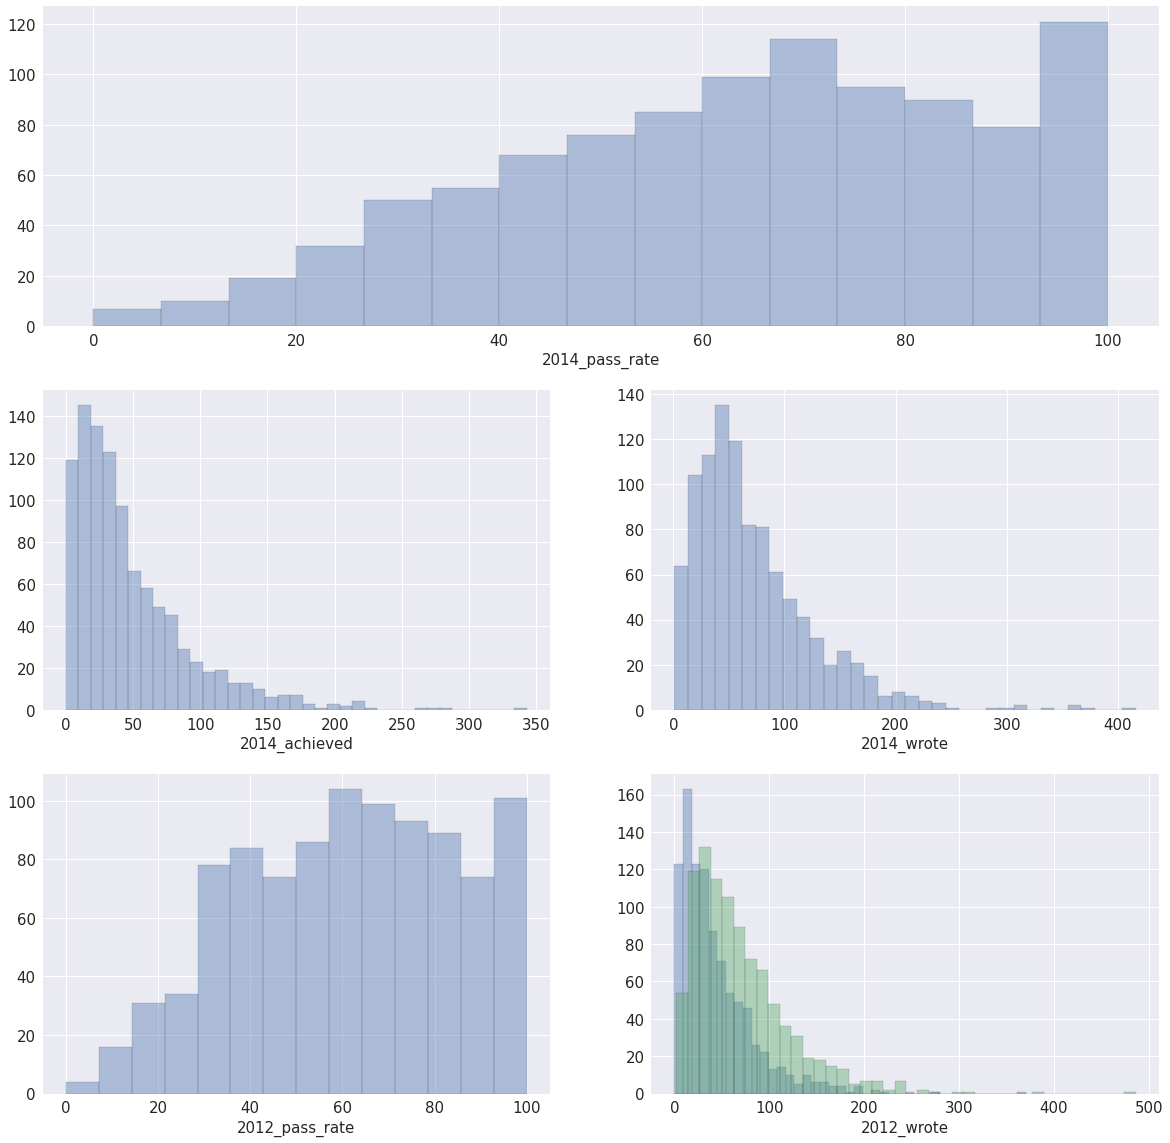

In [5]:
#Setting columns to work with when creating visualisations
stats = data['2014_pass_rate']
#creating and plotting the graph while setting the rest of the columns to work with for the visualisations
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,20));
    grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.2);
    plt.rc(('xtick', 'ytick'), labelsize=15); plt.rc('axes', labelsize=15); plt.rcParams["patch.force_edgecolor"] = True;
    _ = plt.subplot(grid[0, 0:]); _ = sns.distplot(stats, kde=False, axlabel='2014_pass_rate');
    _ = plt.subplot(grid[1,0]); _ = sns.distplot(data['2014_achieved'], kde=False, axlabel='2014_achieved');
    _ = plt.subplot(grid[1,1]); _ = sns.distplot(data['2014_wrote'], kde=False, axlabel='2014_wrote');
    _ = plt.subplot(grid[2,0]); _ = sns.distplot(data['2012_pass_rate'], kde=False, axlabel='2012_pass_rate');
    _ = plt.subplot(grid[2,1]); _ = sns.distplot(data['2012_achieved'], kde=False, axlabel='2012_achieved');
    _ = plt.subplot(grid[2,1]); _ = sns.distplot(data['2012_wrote'], kde=False, axlabel='2012_wrote');

In [6]:
The histograms are the visualization of the data above. As you can see 2014 pass rate and 2012 pass rate closely resemble an evenly distributed with 2012 wrote, 2014 wote and 2014 achieved being highly skewed to the left due to a large number of zero or small values in the data set.

SyntaxError: invalid syntax (<ipython-input-6-b89bfcb51b5c>, line 1)

In [19]:
cols = ['school', 'dinaledi']
top_df = data.sort_values('dinaledi', ascending=False)[cols].set_index('school')
top_10_school = top_df
top_10_school

,dinaledi
school,
Tlokweng Senior Secondary,Y
Vuli-Valley Senior Secondary,Y
Mount Frere Senior,Y
Nyanga Senior Secondary,Y
Dr Reginald Cingocombineds,Y
...,...
Kwezilentaba Senior,N
Langaliphumile,N
Lingani Senior Secondary,N


In [ ]:
#### Top in the year
Listed below are the top schools in the year based on the following categprties; 2014_pass_rate	2014_achieved	2014_wrote	2013_pass_rate	2013_achieved	2013_wrote	2012_pass_rate	2012_achieved	2012_wrote

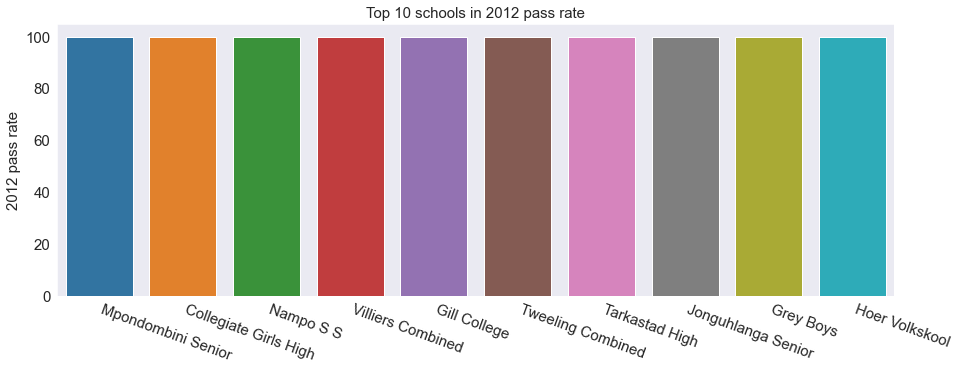

In [17]:
#Setting columns to work with when creating visualisations
cols = ['school', '2012_pass_rate', 'dinaledi']
top_df = data.sort_values('2012_pass_rate', ascending=False)[cols].set_index('school', 'dinaledi')
top_10_school = top_df.head(10)

#Creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2012_pass_rate');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2012 pass rate', fontsize=15);
plt.title('Top 10 schools in 2012 pass rate', fontsize=15);

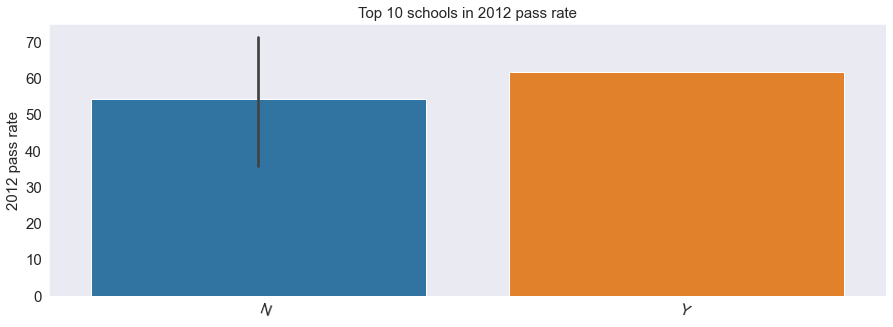

In [14]:

#Setting columns to work with when creating visualisationscols = ['school', '2012_pass_rate', 'dinaledi']
top_df = data.sort_values('school', ascending=False)[cols].set_index('dinaledi')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2012_pass_rate');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2012 pass rate', fontsize=15);
plt.title('Top 10 schools in 2012 pass rate', fontsize=15);

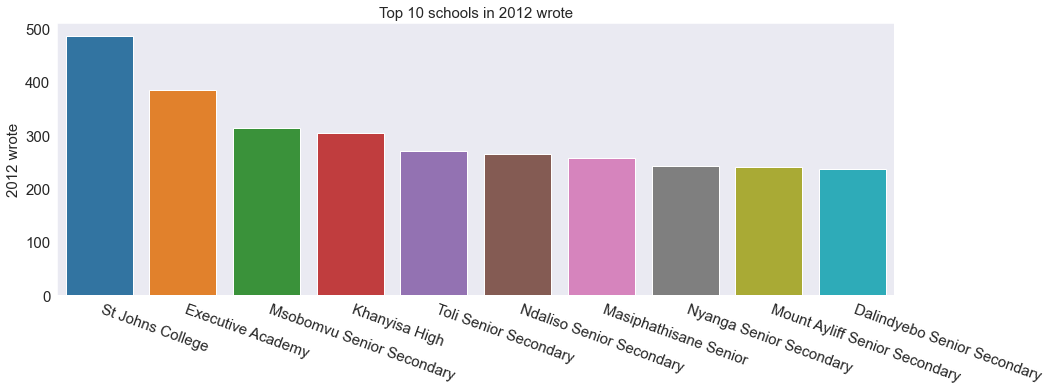

In [7]:

#Setting columns to work with when creating visualisationscols = ['school', '2012_wrote']
top_df = data.sort_values('2012_wrote', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2012_wrote');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2012 wrote', fontsize=15);
plt.title('Top 10 schools in 2012 wrote', fontsize=15);

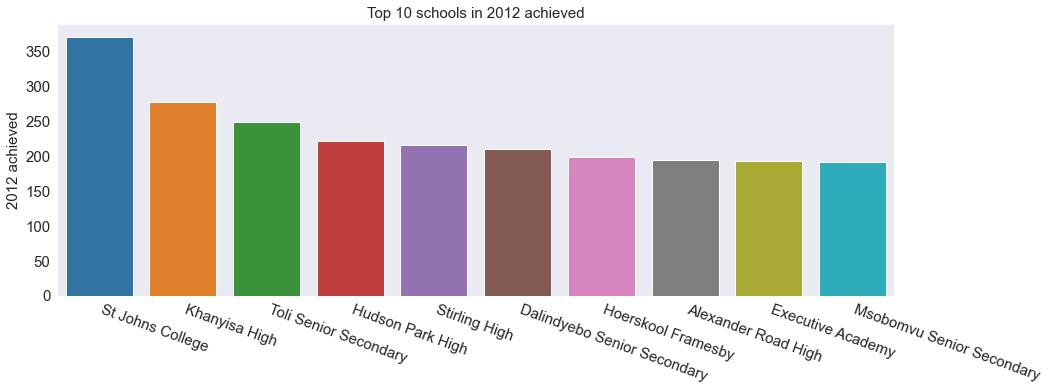

In [8]:
#Setting columns to work with when creating visualisations
cols = ['school', '2012_achieved']
top_df = data.sort_values('2012_achieved', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2012_achieved');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2012 achieved', fontsize=15);
plt.title('Top 10 schools in 2012 achieved', fontsize=15);

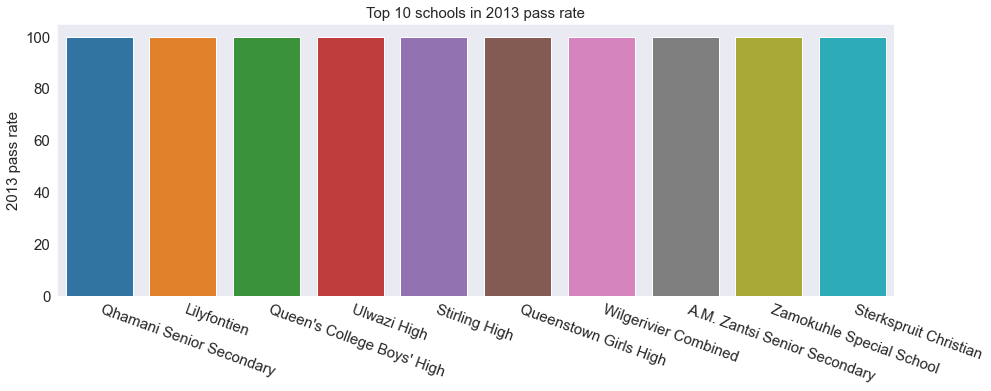

In [9]:
#Setting columns to work with when creating visualisations
cols = ['school', '2013_pass_rate']
top_df = data.sort_values('2013_pass_rate', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2013_pass_rate');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2013 pass rate', fontsize=15);
plt.title('Top 10 schools in 2013 pass rate', fontsize=15);

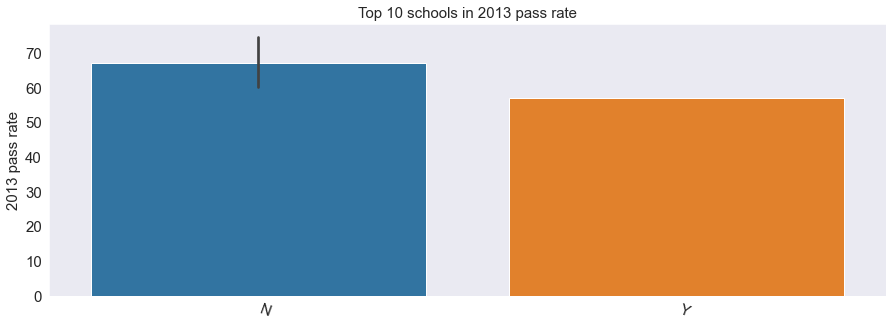

In [15]:
#Setting columns to work with when creating visualisations
cols = ['school', '2013_pass_rate', 'dinaledi']
top_df = data.sort_values('school', ascending=False)[cols].set_index('dinaledi')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2013_pass_rate');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2013 pass rate', fontsize=15);
plt.title('Top 10 schools in 2013 pass rate', fontsize=15);

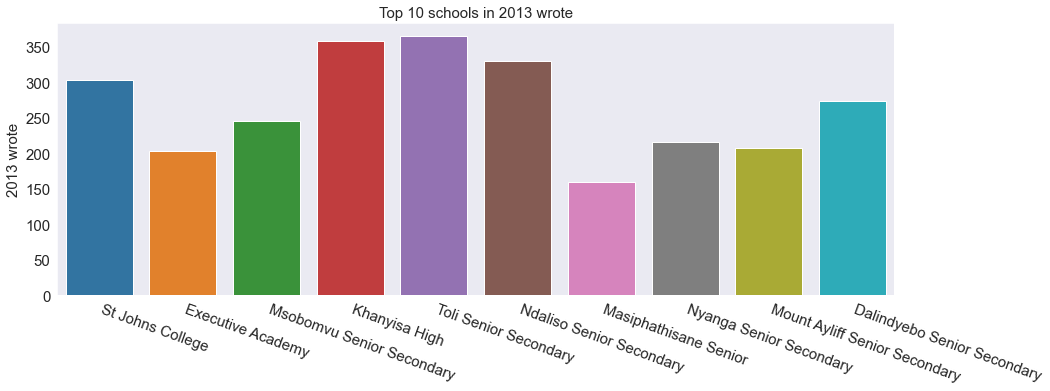

In [10]:
#Setting columns to work with when creating visualisations
cols = ['school', '2013_wrote']
top_df = data.sort_values('2012_wrote', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2013_wrote');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2013 wrote', fontsize=15);
plt.title('Top 10 schools in 2013 wrote', fontsize=15);

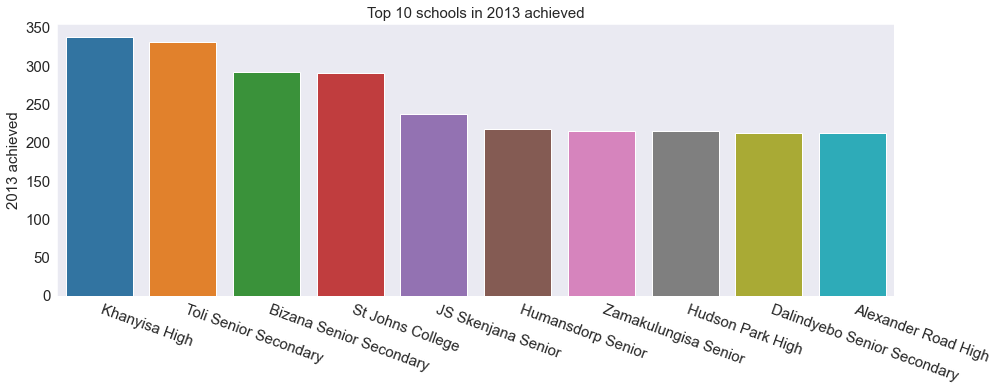

In [13]:
#Setting columns to work with when creating visualisations
cols = ['school', '2013_achieved']
top_df = data.sort_values('2013_achieved', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2013_achieved');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2013 achieved', fontsize=15);
plt.title('Top 10 schools in 2013 achieved', fontsize=15);

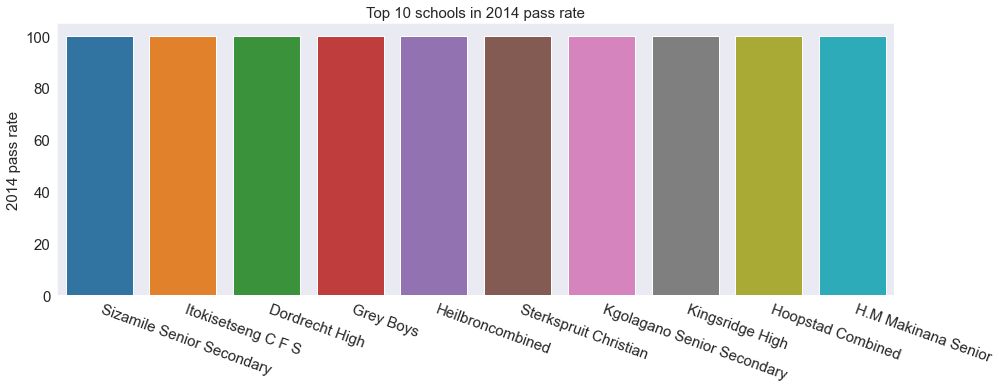

In [11]:
#Setting columns to work with when creating visualisations
cols = ['school', '2014_pass_rate']
top_df = data.sort_values('2014_pass_rate', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2014_pass_rate');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2014 pass rate', fontsize=15);
plt.title('Top 10 schools in 2014 pass rate', fontsize=15);

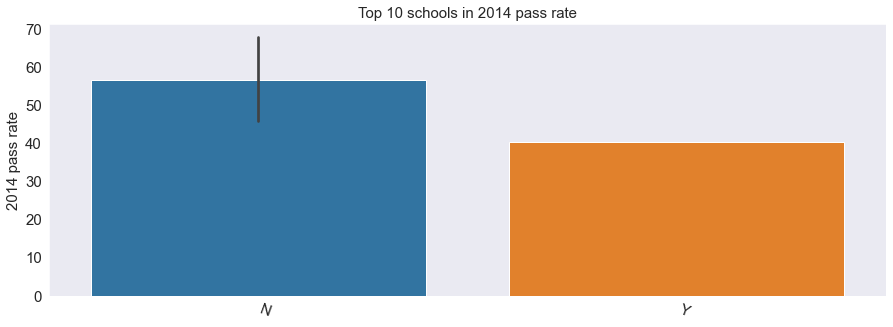

In [16]:
#Setting columns to work with when creating visualisations
cols = ['school', '2014_pass_rate', 'dinaledi']
top_df = data.sort_values('school', ascending=False)[cols].set_index('dinaledi')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2014_pass_rate');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2014 pass rate', fontsize=15);
plt.title('Top 10 schools in 2014 pass rate', fontsize=15);

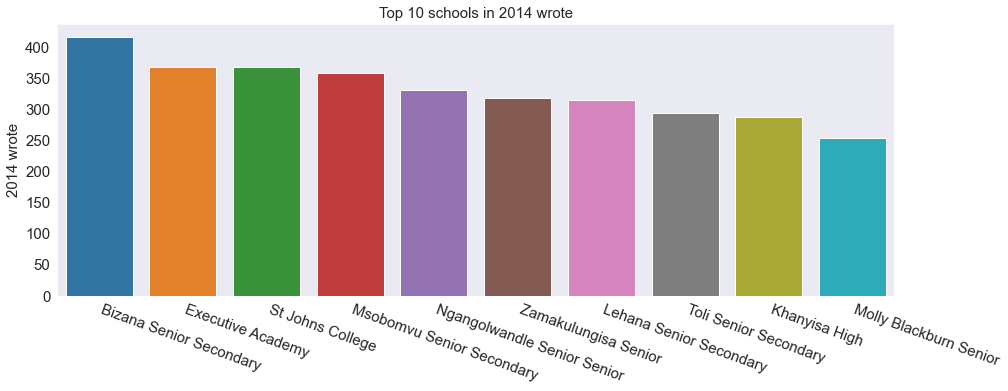

In [12]:
#Setting columns to work with when creating visualisations
cols = ['school', '2014_wrote']
top_df = data.sort_values('2014_wrote', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2014_wrote');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2014 wrote', fontsize=15);
plt.title('Top 10 schools in 2014 wrote', fontsize=15);

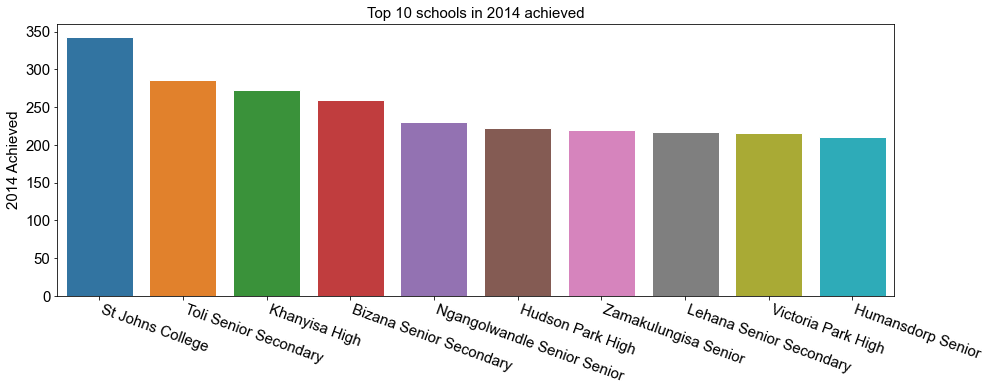

In [3]:
#Setting columns to work with when creating visualisations
cols = ['school', '2014_achieved']
top_df = data.sort_values('2014_achieved', ascending=False)[cols].set_index('school')
top_10_school = top_df.head(10)

#creating and plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_school, x=top_10_school.index, y='2014_achieved');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('2014 Achieved', fontsize=15);
plt.title('Top 10 schools in 2014 achieved', fontsize=15);

In [ ]:
#### Questions and answers

In [ ]:
#### Below are 2012, 2013 and 2014 pass rate by exam no in ascending order

In [5]:
#Setting columns to work with when creating visualisations
cols = ['exam_no', '2012_pass_rate', 'school', 'dinaledi']
top_df = data.sort_values('2012_pass_rate', ascending=True)[cols].set_index('exam_no')
top_10_school = top_df.head(10)
top_10_school

,2012_pass_rate,school,dinaledi
exam_no,,,
4121038,0.0,Mangala Senior Secondary,N
4161006,4.5,Dlulisa Senior Secondary,N
4041033,4.7,Mpingana Senior Secondary,N
4171004,5.3,Dilizintaba Senior Secondary,N
4171040,7.7,Vukani Senior Secondary,N
4121031,7.9,Sobaba High,N
4171042,8.3,Zanobuzwe Senior Secondary,N
4191053,8.7,Ntabakandoda High,N
4121037,9.3,Zanokhanyo Senior,N


In [7]:
#Setting columns to work with when creating visualisations
cols = ['exam_no', '2013_pass_rate', 'school', 'dinaledi']
top_df = data.sort_values('2013_pass_rate', ascending=True)[cols].set_index('exam_no')
top_10_school = top_df.head(10)
top_10_school

,2013_pass_rate,school,dinaledi
exam_no,,,
4191099,0.0,Reshwa Senior Secondary,N
4091018,0.0,Cradock Prison,N
4171014,0.0,Impey Siwisa High,N
4201004,3.2,Carel Du Toit High,N
4201011,4.2,Klipplaat Senior Secondary,N
4161006,4.2,Dlulisa Senior Secondary,N
4011013,9.8,Samuel Nombewu Senior,N
4191033,10.0,Kwezilentaba Senior,N
4191037,11.1,Marheledwane High,N


In [6]:
#Setting columns to work with when creating visualisations
cols = ['exam_no', '2014_pass_rate', 'school', 'dinaledi']
top_df = data.sort_values('2014_pass_rate', ascending=True)[cols].set_index('exam_no')
top_10_school = top_df.head(10)
top_10_school

,2014_pass_rate,school,dinaledi
exam_no,,,
4191056,0.0,Rabula Senior Secondary,N
4191032,0.0,Kwelerana Senior Secondary,N
4171014,0.0,Impey Siwisa High,N
4091018,0.0,Cradock Prison,N
4121043,3.3,Mabhulana Ndamase High,N
4101014,4.5,Gengqe Senior Secondary,N
4151018,6.3,Lukhanyo Senior Secondary,N
4141011,7.7,Lower Seplan Senior,N
4193096,8.3,St. Thomas For The Deaf,N
